# Assignment 2: Enhancement and Filtering
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Transformation functions
# Formulae described on assignment's pdf only translated to python
def t1(image):
    n = float(input())
    ss = float(input())
    sr = float(input())


def t2(image):
    c = float(input())
    if(c > 1) raise ValueError("C must be <= 1")
    k = int(input())
    if(k not in [1,2]) raise ValueError("K must be 1 or 2")


def t3(image):
    row = float(input())
    col = float(input())

In [3]:
# Root Squared Error function
def rse(r, m):
    return np.sqrt(np.sum((m.astype(np.float)-r.astype(np.float))**2))

In [4]:
# Inputs, following assignment's pdf requested sequence
r = imageio.imread(str(input()).rstrip()).astype(np.uint8)
m = int(input())
s = (False, True)[int(input())]
# Note on 's': that is an if. If it's inputted a '0', 's' receives the 0th position of tuple (False, True), as so for '1'.

In [5]:
# Dictionary for functions
t = {1: t1, 2: t2, 3: t3}

# Appling 'm' transformation to original image 'r'
# Storing back on 'm'
m = t[m](r)

# Calculating RSE and printing
print("{:.4f}".format(rse(r, m)))

# Saving
if s:
    imageio.imwrite("images/output_img.png", m)

22072.3745


(-0.5, 224.5, 224.5, -0.5)

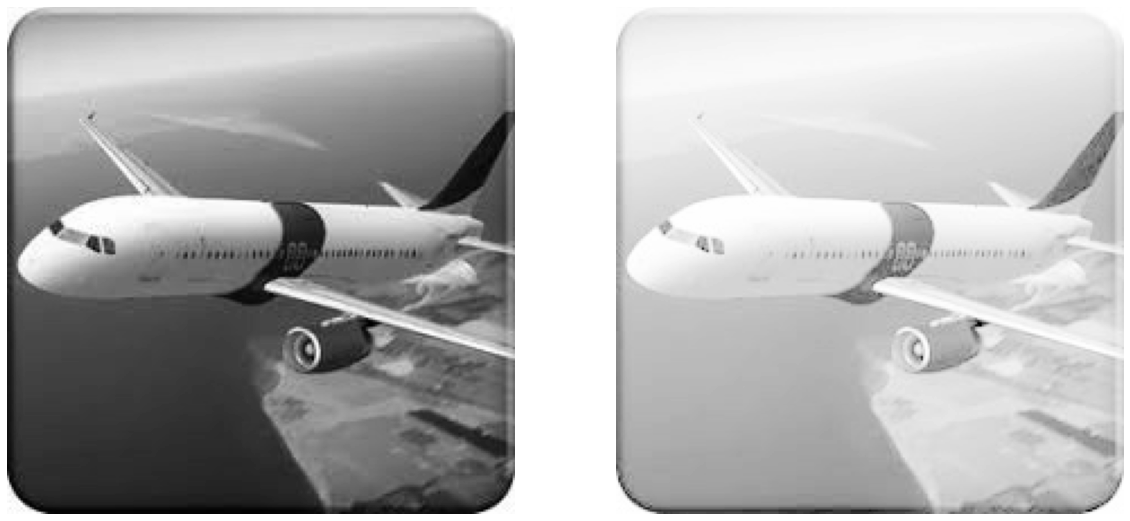

In [6]:
# Plotting
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(m.astype(np.uint8), cmap="gray")
plt.axis('off')